# Metehan Ayhan - Laptop Price Prediction Project

Bu projenin amacı, dizüstü bilgisayarların fiyatlarını çeşitli özellikleri ve yapılandırmalarına dayanarak tahmin etmektir. Makine öğrenimi algoritmaları kullanarak, dizüstü bilgisayar fiyatlarını etkileyen en önemli özellikleri belirlemek ve doğru tahminler yapabilecek bir model geliştirmeyi hedefliyoruz.

<img src='https://i.ytimg.com/vi/A1eU51jPpXQ/maxresdefault.jpg' width='500'>

### Data Dictionary
- Unnamed: 0: Veri kümesindeki her dizüstü bilgisayar için benzersiz bir kimlik numarası.
- Company: Dizüstü bilgisayarın üretici firması (örneğin, Apple, HP).
- TypeName: Dizüstü bilgisayar türü veya kategorisi (örneğin, Ultrabook, Notebook).
- Inches: Dizüstü bilgisayar ekranının boyutu (inç cinsinden).
- ScreenResolution: Dizüstü bilgisayarın ekran çözünürlüğü (örneğin, Full HD 1920x1080, IPS Panel Retina Display 2560x1600).
- Cpu: Dizüstü bilgisayarda kullanılan işlemci tipi ve hızı (örneğin, Intel Core i5 2.3GHz).
- Ram: Dizüstü bilgisayardaki RAM kapasitesi (örneğin, 8GB, 16GB).
- Memory: Depolama kapasitesi ve türü (örneğin, 128GB SSD, 1TB HDD).
- Gpu: Dizüstü bilgisayarda kullanılan grafik işlemci ünitesi (örneğin, Intel Iris Plus Graphics 640, AMD Radeon Pro 455).
- OpSys: Dizüstü bilgisayarın işletim sistemi (örneğin, macOS, Windows, No OS).
- Weight: Dizüstü bilgisayarın ağırlığı (örneğin, 1.37kg, 1.86kg).
- Price: Dizüstü bilgisayarın fiyatı.

### Import Packet

In [5]:
import pandas as pd
pd.set_option("display.max_columns",250)
pd.set_option('display.max_rows', 250)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

### Import Data

In [7]:
df=pd.read_csv('laptop_data.csv')

In [8]:
df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
981,981,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,63669.60
328,328,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.26kg,71128.80
557,557,Lenovo,Notebook,17.3,1600x900,Intel Core i7 7500U 2.7GHz,6GB,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.8kg,50562.72
466,466,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Nvidia GeForce GTX 940MX,Windows 10,2.2kg,24988.32
205,205,Lenovo,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg,74485.44


### EDA - Exploratory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [11]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [12]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

<Axes: xlabel='Price', ylabel='Density'>

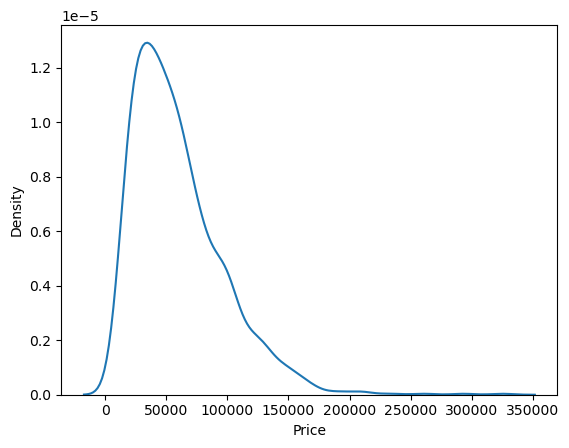

In [83]:
sns.kdeplot(x=df['Price'])

In [13]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [14]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [15]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [16]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [17]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

### Feature Engineering

In [19]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [20]:
def extract_memory_capacity(memory):
    if 'TB' in memory:
        memory = memory.replace('TB', '000')  # TB olanları GB'a çevirelim aynı cins olmalı
    if '+' in memory:
        memory = memory.split(' + ')[0]  # İlk depolama kısmını al
    memory_numeric = ''.join(filter(str.isdigit, memory))  # Sadece sayısal kısmı al
    return int(memory_numeric)

df['Memory_Type'] = df['Memory'].apply(lambda x: 'SSD' if 'SSD' in x else 'HDD' if 'HDD' in x else 'Hybrid')
df['Memory_Capacity'] = df['Memory'].apply(extract_memory_capacity)


In [21]:
df['Panel_Type'] = df['ScreenResolution'].apply(lambda x: next((panel for panel in ['IPS Panel', 'Retina Display', 'Touchscreen', 'Full HD', 'Quad HD', '4K Ultra HD'] if panel in x), 'Other'))
df['Resolution'] = df['ScreenResolution'].apply(lambda x: x.split()[-1] if 'x' in x.split()[-1] else 'Unknown')

In [22]:
df[['ScreenResolution', 'Panel_Type', 'Resolution']]

,ScreenResolution,Panel_Type,Resolution
0,IPS Panel Retina Display 2560x1600,IPS Panel,2560x1600
1,1440x900,Other,1440x900
2,Full HD 1920x1080,Full HD,1920x1080
3,IPS Panel Retina Display 2880x1800,IPS Panel,2880x1800
4,IPS Panel Retina Display 2560x1600,IPS Panel,2560x1600
...,...,...,...
1298,IPS Panel Full HD / Touchscreen 1920x1080,IPS Panel,1920x1080
1299,IPS Panel Quad HD+ / Touchscreen 3200x1800,IPS Panel,3200x1800
1300,1366x768,Other,1366x768
1301,1366x768,Other,1366x768


In [23]:
df['Width'] = df['Resolution'].apply(lambda x: int(x.split('x')[0]))
df['Height'] = df['Resolution'].apply(lambda x: int(x.split('x')[1]))

In [24]:
import re

df['CPU_marka'] = df['Cpu'].apply(lambda x: x.split()[0])  #ilk kelime cpu
df['CPU_Seri'] = df['Cpu'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else 'Unknown')
df['CPU_Model'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[2:3]) if len(x.split()) > 2 else 'Unknown') 

df['GHZ'] = df['Cpu'].apply(lambda x: 
    float(re.search(r'(\d+\.\d+)GHz', x).group(1)) if re.search(r'(\d+\.\d+)GHz', x) else
    float(re.search(r'(\d+)\s*GHz', x).group(1)) if re.search(r'(\d+)\s*GHz', x) else None
)
df[['Cpu', 'CPU_marka', 'CPU_Seri', 'CPU_Model', 'GHZ']]

,Cpu,CPU_marka,CPU_Seri,CPU_Model,GHZ
0,Intel Core i5 2.3GHz,Intel,Core,i5,2.3
1,Intel Core i5 1.8GHz,Intel,Core,i5,1.8
2,Intel Core i5 7200U 2.5GHz,Intel,Core,i5,2.5
3,Intel Core i7 2.7GHz,Intel,Core,i7,2.7
4,Intel Core i5 3.1GHz,Intel,Core,i5,3.1
...,...,...,...,...,...
1298,Intel Core i7 6500U 2.5GHz,Intel,Core,i7,2.5
1299,Intel Core i7 6500U 2.5GHz,Intel,Core,i7,2.5
1300,Intel Celeron Dual Core N3050 1.6GHz,Intel,Celeron,Dual,1.6
1301,Intel Core i7 6500U 2.5GHz,Intel,Core,i7,2.5


In [25]:
df['GPU_Brand'] = df['Gpu'].apply(lambda x: x.split()[0] if len(x.split()) > 1 else 'Unknown')
df['GPU_Model'] = df['Gpu'].apply(lambda x: ' '.join(x.split()[1:]) if len(x.split()) > 1 else 'Unknown')

In [26]:
df.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Memory_Type,Memory_Capacity,Panel_Type,Resolution,Width,Height,CPU_marka,CPU_Seri,CPU_Model,GHZ,GPU_Brand,GPU_Model
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,SSD,128,IPS Panel,2560x1600,2560,1600,Intel,Core,i5,2.3,Intel,Iris Plus Graphics 640
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Hybrid,128,Other,1440x900,1440,900,Intel,Core,i5,1.8,Intel,HD Graphics 6000
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,SSD,256,Full HD,1920x1080,1920,1080,Intel,Core,i5,2.5,Intel,HD Graphics 620


In [27]:
df['GPU_Model'].unique()

array(['Iris Plus Graphics 640', 'HD Graphics 6000', 'HD Graphics 620',
       'Radeon Pro 455', 'Iris Plus Graphics 650', 'Radeon R5',
       'Iris Pro Graphics', 'GeForce MX150', 'UHD Graphics 620',
       'HD Graphics 520', 'Radeon Pro 555', 'Radeon R5 M430',
       'HD Graphics 615', 'Radeon Pro 560', 'GeForce 940MX',
       'HD Graphics 400', 'GeForce GTX 1050', 'Radeon R2', 'Radeon 530',
       'GeForce 930MX', 'HD Graphics', 'HD Graphics 500',
       'GeForce GTX 1060', 'GeForce 150MX', 'Iris Graphics 540',
       'Radeon RX 580', 'GeForce 920MX', 'Radeon R4 Graphics',
       'Radeon 520', 'GeForce GTX 1070', 'GeForce GTX 1050 Ti',
       'GeForce MX130', 'R4 Graphics', 'GeForce GTX 940MX',
       'Radeon RX 560', 'GeForce 920M', 'Radeon R7 M445', 'Radeon RX 550',
       'GeForce GTX 1050M', 'HD Graphics 515', 'Radeon R5 M420',
       'HD Graphics 505', 'GTX 980 SLI', 'R17M-M1-70', 'GeForce GTX 1080',
       'Quadro M1200', 'GeForce GTX 950M', 'FirePro W4190M',
       'GeForce G

In [28]:
df = df.drop(columns=['ScreenResolution', 'Cpu', 'Gpu','Resolution','Memory','Unnamed: 0'])

In [29]:
df=pd.get_dummies(df,drop_first=True)

In [31]:
df['Ram']=df['Ram']**2 #ram özelliğinin etkisini artırdık karesini alarak.. önemli özellikler için yapılır.
df['CPU_Model_i7']=df['CPU_Model_i7']**2  
df['GHZ']=df['GHZ']**2 
df['Memory_Capacity']=df['Memory_Capacity']**3

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Columns: 207 entries, Inches to GPU_Model_UHD Graphics 620
dtypes: bool(198), float64(4), int32(1), int64(3), int8(1)
memory usage: 329.7 KB


In [33]:
df.sample(6)

,Inches,Ram,Weight,Price,Memory_Capacity,Width,Height,GHZ,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,Memory_Type_Hybrid,Memory_Type_SSD,Panel_Type_Full HD,Panel_Type_IPS Panel,Panel_Type_Other,Panel_Type_Quad HD,Panel_Type_Touchscreen,CPU_marka_Intel,CPU_marka_Samsung,CPU_Seri_A12-Series,CPU_Seri_A4-Series,CPU_Seri_A6-Series,CPU_Seri_A8-Series,CPU_Seri_A9-Series,CPU_Seri_Atom,CPU_Seri_Celeron,CPU_Seri_Core,CPU_Seri_Cortex,CPU_Seri_E-Series,CPU_Seri_FX,CPU_Seri_Pentium,CPU_Seri_Ryzen,CPU_Seri_Xeon,CPU_Model_1700,CPU_Model_6110,CPU_Model_7110,CPU_Model_7210,CPU_Model_7310,CPU_Model_7410,CPU_Model_8800P,CPU_Model_9000,CPU_Model_9000e,CPU_Model_9220,CPU_Model_9410,CPU_Model_9420,CPU_Model_9600P,CPU_Model_9620P,CPU_Model_9700P,CPU_Model_9720P,CPU_Model_9830P,CPU_Model_A10-9620P,CPU_Model_A6-9220,CPU_Model_A72&A53,CPU_Model_A9-9420,CPU_Model_Dual,CPU_Model_E2-6110,CPU_Model_E2-9000,CPU_Model_E2-9000e,CPU_Model_E3-1505M,CPU_Model_E3-1535M,CPU_Model_M,CPU_Model_Quad,CPU_Model_X5-Z8350,CPU_Model_Z8350,CPU_Model_i3,CPU_Model_i5,CPU_Model_i7,CPU_Model_x5-Z8300,CPU_Model_x5-Z8350,CPU_Model_x5-Z8550,GPU_Brand_ARM,GPU_Brand_Intel,GPU_Brand_Nvidia,GPU_Model_FirePro W5130M,GPU_Model_FirePro W6150M,GPU_Model_GTX 980 SLI,GPU_Model_GeForce 150MX,GPU_Model_GeForce 920,GPU_Model_GeForce 920M,GPU_Model_GeForce 920MX,GPU_Model_GeForce 930M,GPU_Model_GeForce 930MX,GPU_Model_GeForce 940M,GPU_Model_GeForce 940MX,GPU_Model_GeForce 960M,GPU_Model_GeForce GT 940MX,GPU_Model_GeForce GTX 1050,GPU_Model_GeForce GTX 1050 Ti,GPU_Model_GeForce GTX 1050M,GPU_Model_GeForce GTX 1050Ti,GPU_Model_GeForce GTX 1060,GPU_Model_GeForce GTX 1070,GPU_Model_GeForce GTX 1070M,GPU_Model_GeForce GTX 1080,GPU_Model_GeForce GTX 930MX,GPU_Model_GeForce GTX 940M,GPU_Model_GeForce GTX 940MX,GPU_Model_GeForce GTX 950M,GPU_Model_GeForce GTX 960,GPU_Model_GeForce GTX 960<U+039C>,GPU_Model_GeForce GTX 960M,GPU_Model_GeForce GTX 965M,GPU_Model_GeForce GTX 970M,GPU_Model_GeForce GTX 980,GPU_Model_GeForce GTX 980M,GPU_Model_GeForce GTX1050 Ti,GPU_Model_GeForce GTX1060,GPU_Model_GeForce GTX1080,GPU_Model_GeForce MX130,GPU_Model_GeForce MX150,GPU_Model_Graphics 620,GPU_Model_HD Graphics,GPU_Model_HD Graphics 400,GPU_Model_HD Graphics 405,GPU_Model_HD Graphics 500,GPU_Model_HD Graphics 505,GPU_Model_HD Graphics 510,GPU_Model_HD Graphics 515,GPU_Model_HD Graphics 520,GPU_Model_HD Graphics 530,GPU_Model_HD Graphics 5300,GPU_Model_HD Graphics 540,GPU_Model_HD Graphics 6000,GPU_Model_HD Graphics 615,GPU_Model_HD Graphics 620,GPU_Model_HD Graphics 630,GPU_Model_Iris Graphics 540,GPU_Model_Iris Graphics 550,GPU_Model_Iris Plus Graphics 640,GPU_Model_Iris Plus Graphics 650,GPU_Model_Iris Pro Graphics,GPU_Model_Mali T860 MP4,GPU_Model_Quadro 3000M,GPU_Model_Quadro M1000M,GPU_Model_Quadro M1200,GPU_Model_Quadro M2000M,GPU_Model_Quadro M2200,GPU_Model_Quadro M2200M,GPU_Model_Quadro M3000M,GPU_Model_Quadro M500M,GPU_Model_Quadro M520M,GPU_Model_Quadro M620,GPU_Model_Quadro M620M,GPU_Model_R17M-M1-70,GPU_Model_R4 Graphics,GPU_Model_Radeon 520,GPU_Model_Radeon 530,GPU_Model_Radeon 540,GPU_Model_Radeon Pro 455,GPU_Model_Radeon Pro 555,GPU_Model_Radeon Pro 560,GPU_Model_Radeon R2,GPU_Model_Radeon R2 Graphics,GPU_Model_Radeon R3,GPU_Model_Radeon R4,GPU_Model_Radeon R4 Graphics,GPU_Model_Radeon R5,GPU_Model_Radeon R5 430,GPU_Model_Radeon R5 520,GPU_Model_Radeon R5 M315,GPU_Model_Radeon R5 M330,GPU_Model_Radeon R5 M420,GPU_Model_Radeon R5 M420X,GPU_Model_Radeon R5 M430,GPU_Model_Radeon R7,GPU_Model_Radeon R7 Graphics,GPU_Model_Radeon R7 M360,GPU_Model_Radeon R7 M365X,GPU_Model_Radeon R7 M440,

### Modelling

In [35]:
x=df.drop('Price', axis=1)
y=df[['Price']]

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) 

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        # Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()
        rf = RandomForestRegressor()

        # Modellerin listesini oluşturuyorum
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,svr,mlp_regressor,rf]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','SVR','MLP Regressor', 'Random Forest']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        # Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
        # Result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       # Oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp döndürüyorum
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable


In [87]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,8.631172e-01,1.404880e+04,9.233880e+03
Ridge,8.331914e-01,1.550865e+04,1.108278e+04
Lasso,8.211356e-01,1.605930e+04,1.116356e+04
Linear,8.168701e-01,1.624966e+04,1.126903e+04
Random Forest,8.142050e-01,1.636747e+04,9.788015e+03
ElasticNet,6.713089e-01,2.177001e+04,1.565868e+04
Decision Tree,6.709344e-01,2.178241e+04,1.298622e+04
AdaBoost,6.599678e-01,2.214240e+04,1.323616e+04
KNeighborsRegressor,6.069375e-01,2.380650e+04,1.949871e+04
Extra Tree,5.845966e-01,2.447370e+04,1.406935e+04


In [39]:
from sklearn.ensemble import GradientBoostingRegressor

In [40]:
model=GradientBoostingRegressor()
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [41]:
tahmin=model.predict(x_test)

In [42]:
r2_score(y_test,tahmin)

0.8639451238340511

In [43]:
mean_squared_error(y_test,tahmin)**.5

14006.244984153012

### Results

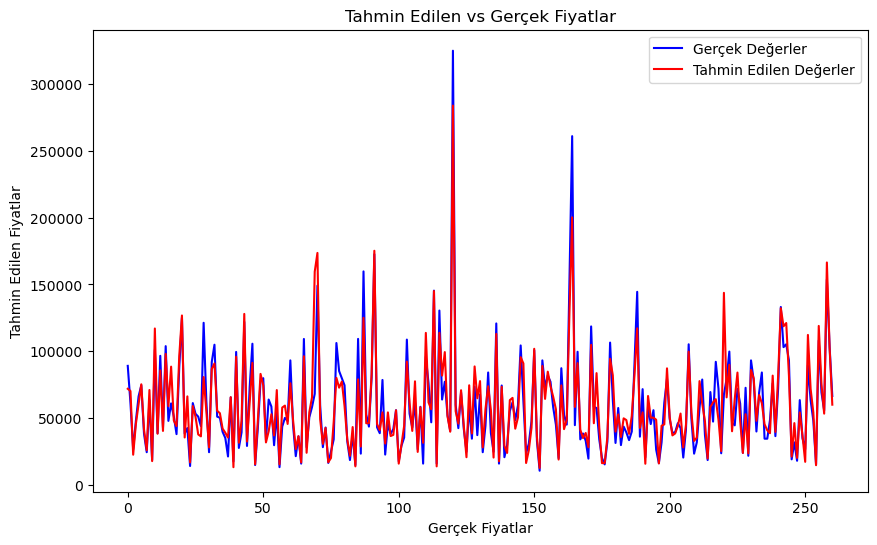

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Gerçek Değerler', color='blue')
plt.plot(tahmin, label='Tahmin Edilen Değerler', color='red')
plt.xlabel('Gerçek Fiyatlar')
plt.ylabel('Tahmin Edilen Fiyatlar')
plt.title('Tahmin Edilen vs Gerçek Fiyatlar')
plt.legend()
plt.show()

Sonuç olarak laptop fiyatlarını %86 oranında doğru tahmin eden bir model geliştirildi.